<a href="https://colab.research.google.com/github/23subbhashit/ICC-TEST-CRICKET/blob/master/icc_test_cricket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
f=files.upload()

Saving ICC Test Batting Figures.csv to ICC Test Batting Figures.csv


In [4]:
import pandas as pd
data=pd.read_csv("ICC Test Batting Figures.csv",header=0,encoding = 'unicode_escape')
data.head(5)

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14,http://stats.espncricinfo.com/ci/content/playe...
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,http://stats.espncricinfo.com/ci/content/playe...
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,http://stats.espncricinfo.com/ci/content/playe...
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,http://stats.espncricinfo.com/ci/content/playe...
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,http://stats.espncricinfo.com/ci/content/playe...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 12 columns):
Player            3001 non-null object
Span              3001 non-null object
Mat               3001 non-null int64
Inn               3001 non-null object
NO                3001 non-null object
Runs              3001 non-null object
HS                3001 non-null object
Avg               3001 non-null object
100               3001 non-null object
50                3001 non-null object
0                 3001 non-null object
Player Profile    3001 non-null object
dtypes: int64(1), object(11)
memory usage: 281.5+ KB


In [6]:
data.describe()

,Mat
count,3001.000000
mean,17.427191
std,24.954654
min,1.000000
25%,2.000000
50%,7.000000
75%,21.000000
max,200.000000


In [0]:
def row(player):
    if '*' in player['HS']:
        return 1
    else:
        return 0

data['hs_not_out'] = data.apply(row, axis=1)

In [8]:
data.head()

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile,hs_not_out
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14,http://stats.espncricinfo.com/ci/content/playe...,1
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,http://stats.espncricinfo.com/ci/content/playe...,0
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,http://stats.espncricinfo.com/ci/content/playe...,0
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,http://stats.espncricinfo.com/ci/content/playe...,0
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,http://stats.espncricinfo.com/ci/content/playe...,0


In [0]:
data['HS'] = data['HS'].str.replace('*', '')
data['HS'] = data['HS'].str.replace('-', '0')
data['Mat'] = data['Mat'].replace('-', '0')
data['Inn'] = data['Inn'].str.replace('-', '0')
data['NO'] = data['NO'].str.replace('-', '0')
data['Runs'] = data['Runs'].str.replace('-', '0')
data['100'] = data['100'].str.replace('-', '0')
data['50'] = data['50'].str.replace('-', '0')
data['0'] = data['0'].str.replace('-', '0')
data['Avg'] = data['Avg'].str.replace('-', '0')

In [0]:
data['Inn'] = data['Inn'].astype('int32')
data['NO'] = data['NO'].astype('int32')
data['Runs'] = data['Runs'].astype('int32')
data['HS'] = data['HS'].astype('int32')
data['Avg'] = data['Avg'].astype('float32')
data['100'] = data['100'].astype('int32')
data['50'] = data['50'].astype('int32')
data['0'] = data['0'].astype('int32')

<Figure size 1080x432 with 0 Axes>

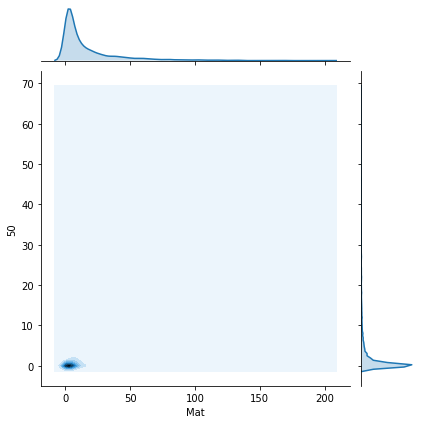

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
g = sns.jointplot(x="Mat", y="50", data=data,kind="kde")

<Figure size 1080x432 with 0 Axes>

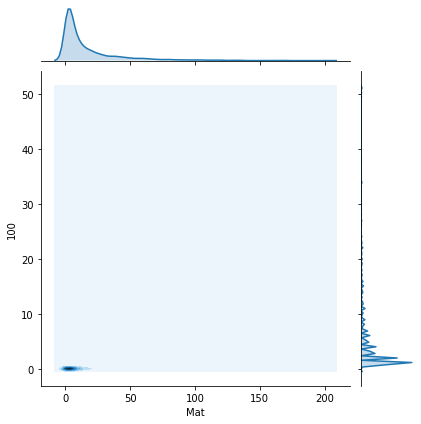

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
g = sns.jointplot(x="Mat", y="100", data=data,kind="kde")

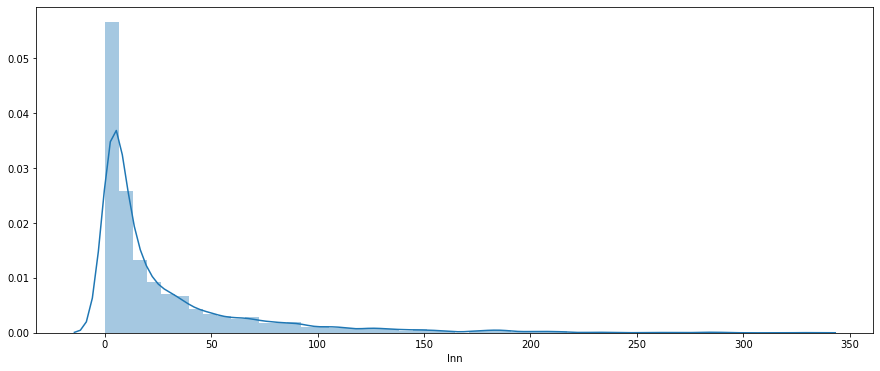

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
sns.distplot(data["Inn"])

Text(0.5, 1.0, 'Np. of innings played vs centuries scored')

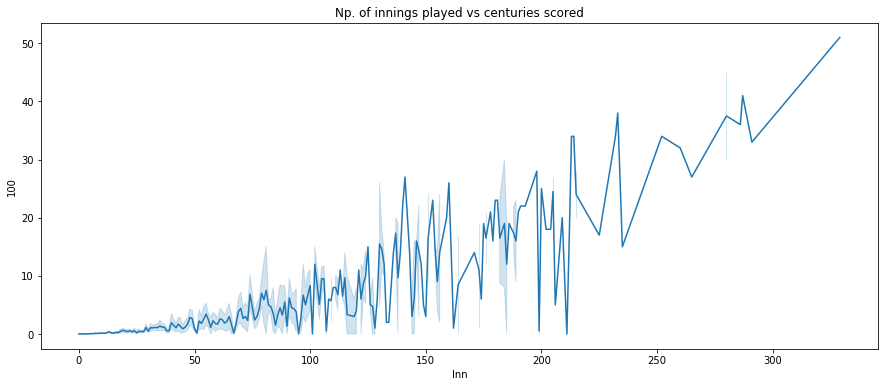

In [14]:
plt.figure(figsize=(15,6))
sns.lineplot(data['Inn'], data['100'])
plt.title('Np. of innings played vs centuries scored')

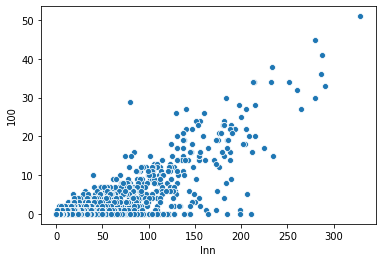

In [15]:
sns.scatterplot(data['Inn'], data['100'])

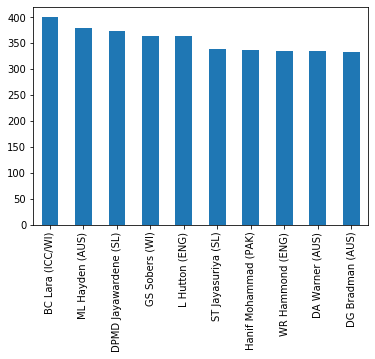

In [16]:
import numpy as np
top_10_HS = data['HS'].sort_values(ascending=False)[:10].index
top_10 = data.iloc[top_10_HS]
top_10['HS'].plot.bar()
y = np.arange(10)
plt.xticks(y, labels=top_10['Player'])
plt.show()

Text(0.5, 1.0, 'High score vs no. of innings played')

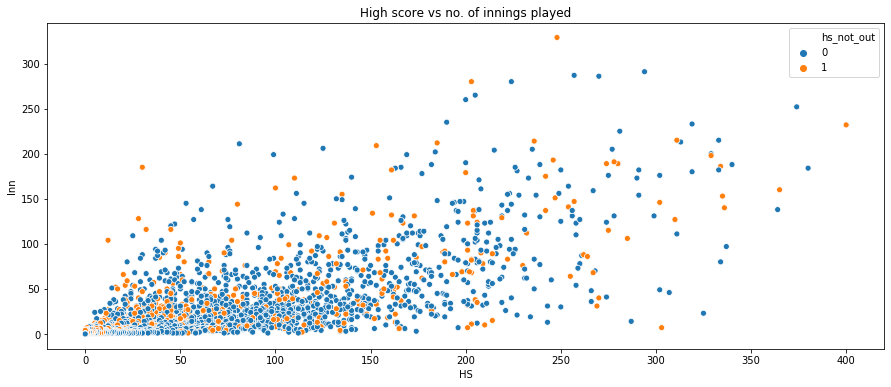

In [17]:
plt.figure(figsize=(15,6))
sns.scatterplot(data['HS'], data['Inn'], hue=data['hs_not_out'])
plt.title('High score vs no. of innings played')

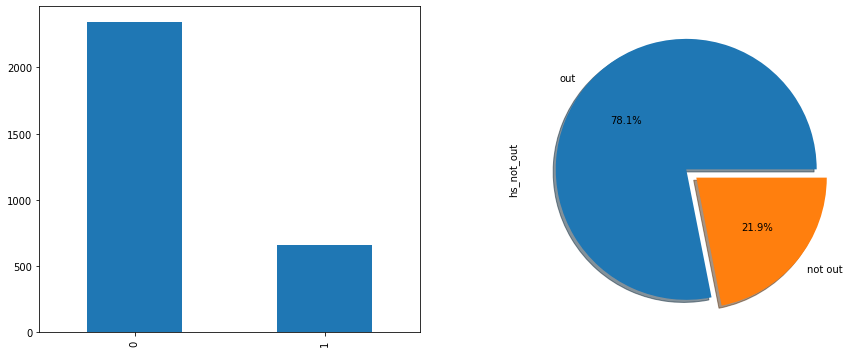

In [23]:
f, ax = plt.subplots(1,2,figsize=(15,6))
data['hs_not_out'].value_counts().plot.bar(ax=ax[0])
labels = ['out', 'not out']
data['hs_not_out'].value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%', labels=labels,shadow="True",explode=(0,0.1))

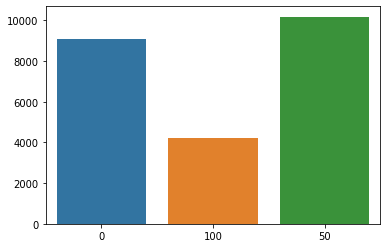

In [19]:
a=["0","50","100"]
b=[data["0"].sum(),data["50"].sum(),data["100"].sum()]
sns.barplot(a,b)

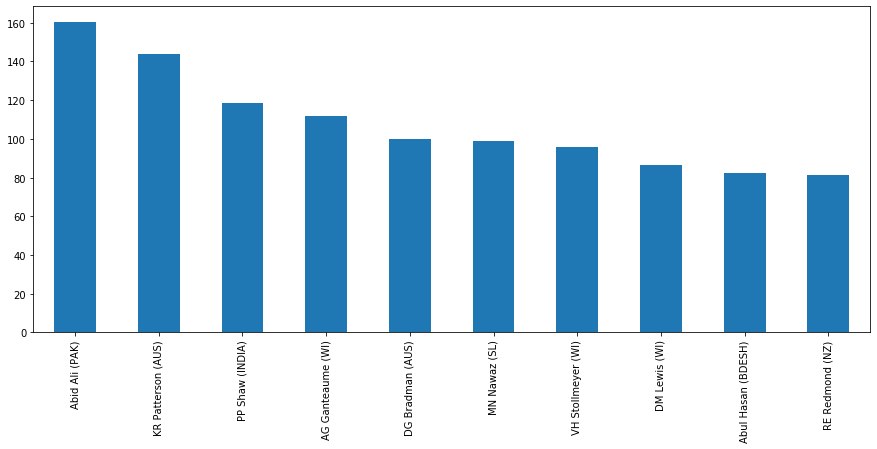

In [40]:
plt.figure(figsize=(15,6))
top_10_avg = data['Avg'].sort_values(ascending=False)[:10].index
top_10 = data.iloc[top_10_avg]
top_10['Avg'].plot.bar()
y = np.arange(10)
plt.xticks(y, labels=top_10['Player'])
plt.show()

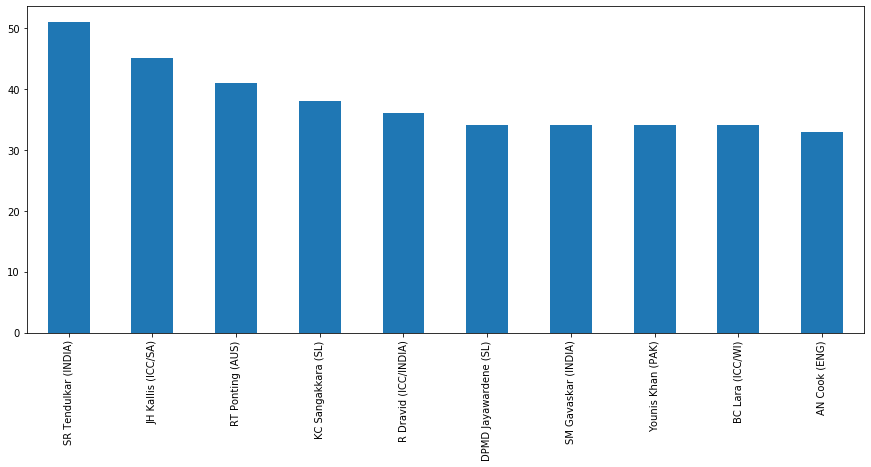

In [43]:
plt.figure(figsize=(15,6))
top_10_avg = data['100'].sort_values(ascending=False)[:10].index
top_10 = data.iloc[top_10_avg]
top_10['100'].plot.bar()
y = np.arange(10)
plt.xticks(y, labels=top_10['Player'])
plt.show()